In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [ ]:
### NOTE THAT THIS WILL CLEAR YOUR GOOGLE DRIVE TRASH

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
my_drive = GoogleDrive(gauth)

### delete gdrive trash files (keras checkpoint files can accumulate in trash) [[2023-06-03]]-0922-27
def clear_gdrive_trash():
    '''
    ### NOTE THAT THIS WILL CLEAR YOUR GOOGLE DRIVE TRASH

    '''
    count=0
    # for a_file in my_drive.ListFile({'q': "title contains 'ckpt' and trashed = true"}).GetList():
    for a_file in my_drive.ListFile({'q': "trashed = true"}).GetList():
        count+=1
        # print the name of the file being deleted.
        pass
        # print(a_file['title'])
        print(f'the file {a_file["title"]}, is about to get deleted permanently.')
        # delete the file permanently.
        a_file.Delete()
    print(count)
clear_gdrive_trash()

the file Copy of 2023_05_21_capstone_arjun(2).ipynb, is about to get deleted permanently.
1


In [ ]:
### to mount google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
### to download the dataset from kaggle
!pip install kaggle
! mkdir ~/.kaggle
! cp '/content/drive/MyDrive/kaggle.json' ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download --force shyambhu/hands-and-palm-images-dataset


! mkdir /content/drive/MyDrive/ML-AI_capstone_project ### all the files created by this notebook will be in this base folder
! mkdir /content/drive/MyDrive/ML-AI_capstone_project/hands_dataset_Afifi/

### to copy the downloaded dataset to drive ; so that afterwards the dataset can be copied from drive instead of downloading from kaggle everytime.
! cp "/content/hands-and-palm-images-dataset.zip" "/content/drive/MyDrive/ML-AI_capstone_project/hands_dataset_Afifi/"



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
 99% 625M/634M [00:09<00:00, 43.9MB/s]
100% 634M/634M [00:09<00:00, 67.6MB/s]
mkdir: cannot create directory ‘/content/drive/MyDrive/ML-AI_capstone_project’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/ML-AI_capstone_project/hands_dataset_Afifi/’: File exists


In [ ]:
### directory to store saved models
! mkdir '/content/drive/MyDrive/ML-AI_capstone_project/models'

mkdir: cannot create directory ‘/content/drive/MyDrive/ML-AI_capstone_project/models’: File exists


In [ ]:
drive_project_folder_path='/content/drive/MyDrive/ML-AI_capstone_project'

In [ ]:
### after downloading the dataset once from kaggle and copying the zip file to google drive you can
###  copy the dataset zip file from drive to colab filesystem
### instead of downloading everytime from kaggle
! cp "/content/drive/MyDrive/ML-AI_capstone_project/hands_dataset_Afifi/hands-and-palm-images-dataset.zip" "/content/hands-and-palm-images-dataset.zip"

In [ ]:
!unzip hands-and-palm-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Hands/Hands/Hand_0006508.jpg  
  inflating: Hands/Hands/Hand_0006509.jpg  
  inflating: Hands/Hands/Hand_0006510.jpg  
  inflating: Hands/Hands/Hand_0006511.jpg  
  inflating: Hands/Hands/Hand_0006512.jpg  
  inflating: Hands/Hands/Hand_0006513.jpg  
  inflating: Hands/Hands/Hand_0006514.jpg  
  inflating: Hands/Hands/Hand_0006515.jpg  
  inflating: Hands/Hands/Hand_0006516.jpg  
  inflating: Hands/Hands/Hand_0006517.jpg  
  inflating: Hands/Hands/Hand_0006518.jpg  
  inflating: Hands/Hands/Hand_0006519.jpg  
  inflating: Hands/Hands/Hand_0006520.jpg  
  inflating: Hands/Hands/Hand_0006521.jpg  
  inflating: Hands/Hands/Hand_0006522.jpg  
  inflating: Hands/Hands/Hand_0006523.jpg  
  inflating: Hands/Hands/Hand_0006524.jpg  
  inflating: Hands/Hands/Hand_0006525.jpg  
  inflating: Hands/Hands/Hand_0006526.jpg  
  inflating: Hands/Hands/Hand_0006527.jpg  
  inflating: Hands/Hands/Hand_0006528.jpg  
  inflating: Hands/Hands/

In [ ]:
# ! du -sh "/content/hands-and-palm-images-dataset.zip"

In [ ]:
# ! cp -r "/content/Hands" "/content/drive/MyDrive/ML-AI_capstone_project/hands_dataset_Afifi"
# ! cp "/content/HandInfo.csv" "/content/drive/MyDrive/ML-AI_capstone_project/hands_dataset_Afifi"


In [ ]:
### copying directory of images directly from drive is slower that copying the zip file and then unziping [[2023-06-03]]-0924-45

# ! cp -r "/content/drive/MyDrive/ML-AI_capstone_project/hands_dataset_Afifi/Hands" "/content/Hands2"
# ! cp "/content/drive/MyDrive/ML-AI_capstone_project/hands_dataset_Afifi/HandInfo.csv" "/content/HandInfo.csv"

In [ ]:

from tensorflow.keras.utils import image_dataset_from_directory


In [ ]:
import pandas as pd
dataset_dir_path='/content/Hands/Hands'
df=pd.read_csv('HandInfo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11076 entries, 0 to 11075
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              11076 non-null  int64 
 1   age             11076 non-null  int64 
 2   gender          11076 non-null  object
 3   skinColor       11076 non-null  object
 4   accessories     11076 non-null  int64 
 5   nailPolish      11076 non-null  int64 
 6   aspectOfHand    11076 non-null  object
 7   imageName       11076 non-null  object
 8   irregularities  11076 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 778.9+ KB


### EDA

In [ ]:
df

id  age  gender skinColor  accessories  nailPolish  aspectOfHand  \
0         0   27    male      fair            0           0  dorsal right   
1         0   27    male      fair            0           0  dorsal right   
2         0   27    male      fair            0           0  dorsal right   
3         0   27    male      fair            0           0  dorsal right   
4         0   27    male      fair            0           0  dorsal right   
...     ...  ...     ...       ...          ...         ...           ...   
11071  1589   22  female      fair            0           0   palmar left   
11072  1589   22  female      fair            0           0   palmar left   
11073  1589   22  female      fair            0           0   palmar left   
11074  1589   22  female      fair            0           0   palmar left   
11075  1589   22  female      fair            0           0   palmar left   

              imageName  irregularities  
0      Hand_0000002.jpg               0  
1      Hand_0000003.jpg               0  
2      Hand_0000004.jpg               0  
3      Hand_0000005.jpg               0  
4      Hand_0000006.jpg               0  
...                 ...             ...  
11071  Hand_0011740.jpg               0  
11072  Hand_0011741.jpg               0  
11073  Hand_0011742.jpg               0  
11074  Hand_0011743.jpg               0  
11075  Hand_0011744.jpg               0  

[11076 rows x 9 columns]

In [ ]:

## waste
# def get_raw_image(dataset_dir_path):
#     full_img_np =cv2.imread(f'{dataset_dir_path}/Hand_0000002.jpg')
#     return full_img_np.shape

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11076 entries, 0 to 11075
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              11076 non-null  int64 
 1   age             11076 non-null  int64 
 2   gender          11076 non-null  object
 3   skinColor       11076 non-null  object
 4   accessories     11076 non-null  int64 
 5   nailPolish      11076 non-null  int64 
 6   aspectOfHand    11076 non-null  object
 7   imageName       11076 non-null  object
 8   irregularities  11076 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 778.9+ KB


In [ ]:
# df.duplicated().sum() ## get number of duplicate rows

In [ ]:
# df.drop(['imageName','id'],axis=1).mode() ### most common categories

In [ ]:
from IPython.display import display, HTML


value_counts of age  21    4930
22    2434
20    1935
23     795
27     133
26     124
24      97
70      84
75      83
25      81
19      78
28      63
54      52
18      48
43      46
29      40
36      28
30      25
Name: age, dtype: int64
value_counts of gender  female    7109
male      3967
Name: gender, dtype: int64
value_counts of skinColor  medium       6495
fair         3493
dark          758
very fair     330
Name: skinColor, dtype: int64
value_counts of accessories  0    7865
1    3211
Name: accessories, dtype: int64
value_counts of nailPolish  0    10009
1     1067
Name: nailPolish, dtype: int64
value_counts of aspectOfHand  dorsal right    2892
palmar right    2813
dorsal left     2788
palmar left     2583
Name: aspectOfHand, dtype: int64
value_counts of irregularities  0    10912
1      164
Name: irregularities, dtype: int64


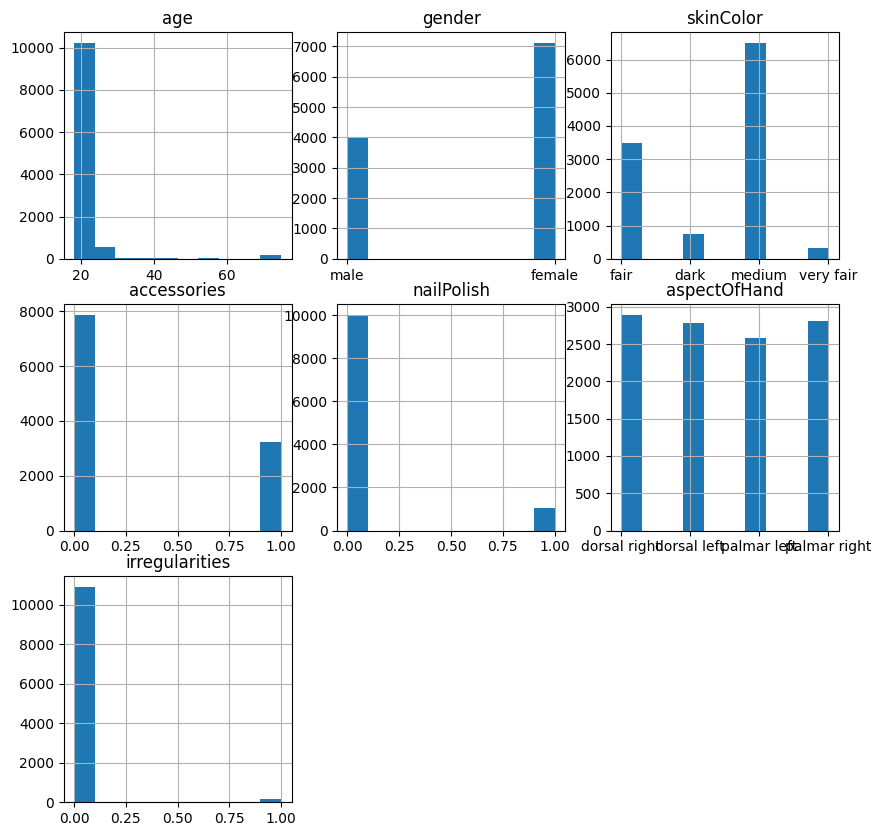

In [ ]:
def display_histograms_subplots(df):
    value_counts_dict={}
    cols_to_exclude=['imageName','id']
    plt.figure(figsize=(10,10)).tight_layout(h_pad=2)
    count=0
    for col_name in df.columns.to_list():
        if col_name not in cols_to_exclude:
            value_counts_dict[col_name]=df[col_name].value_counts()
            print(f'value_counts of {col_name} ',value_counts_dict[col_name])
            count+=1
            plt.subplot(3,3,count)
            plt.gca().set_title(col_name)
            df[col_name].hist()
            # if col_name in ['age']:
            #     plt.figure()
            #     plt.title(col_name)
            #     plt.boxplot(df[col_name].to_list())
        # display(value_counts_dict[col_name])
        # display(HTML(value_counts_dict[col_name].to_html()))
display_histograms_subplots(df)

value_counts of age  21    4930
22    2434
20    1935
23     795
27     133
26     124
24      97
70      84
75      83
25      81
19      78
28      63
54      52
18      48
43      46
29      40
36      28
30      25
Name: age, dtype: int64
value_counts of gender  female    7109
male      3967
Name: gender, dtype: int64
value_counts of skinColor  medium       6495
fair         3493
dark          758
very fair     330
Name: skinColor, dtype: int64
value_counts of accessories  0    7865
1    3211
Name: accessories, dtype: int64
value_counts of nailPolish  0    10009
1     1067
Name: nailPolish, dtype: int64
value_counts of aspectOfHand  dorsal right    2892
palmar right    2813
dorsal left     2788
palmar left     2583
Name: aspectOfHand, dtype: int64
value_counts of irregularities  0    10912
1      164
Name: irregularities, dtype: int64


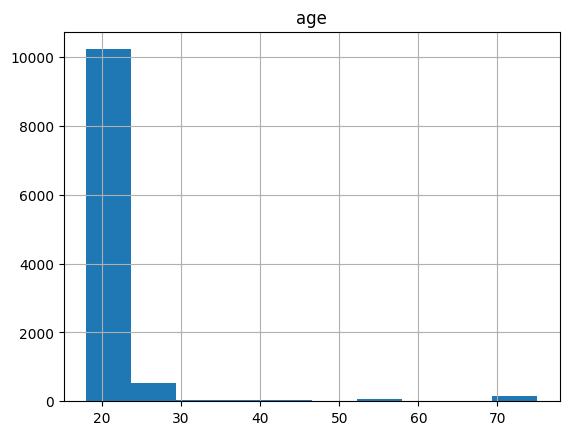

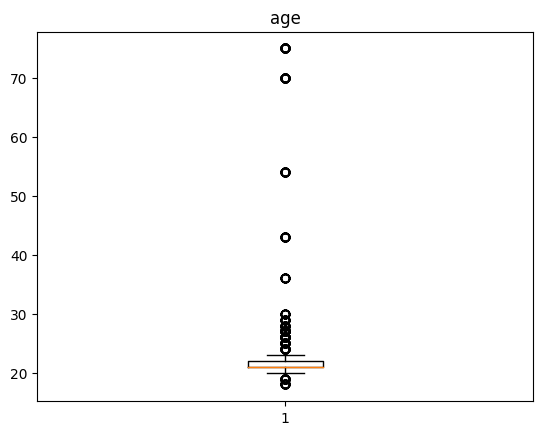

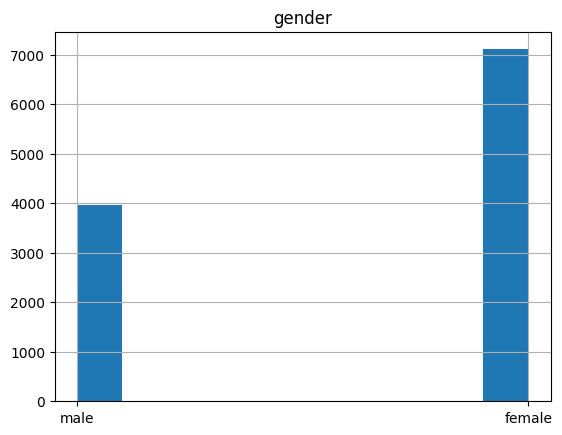

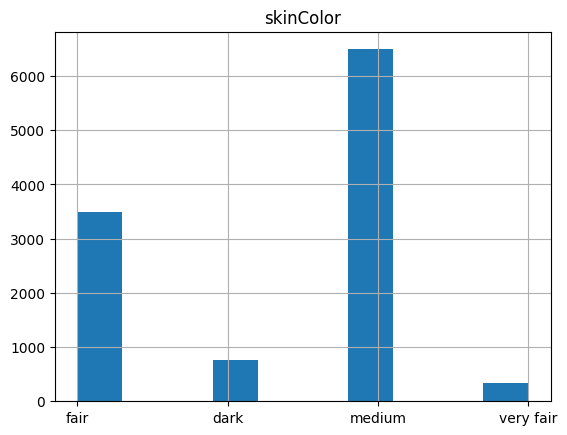

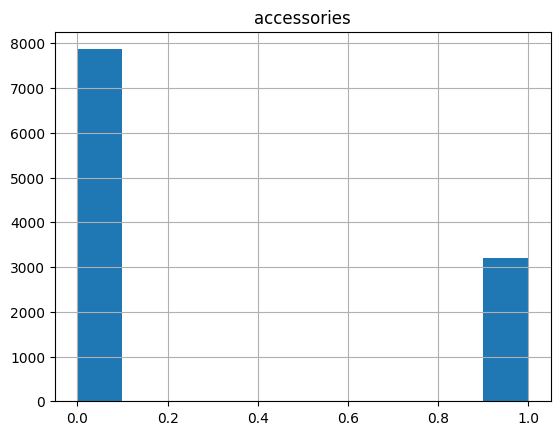

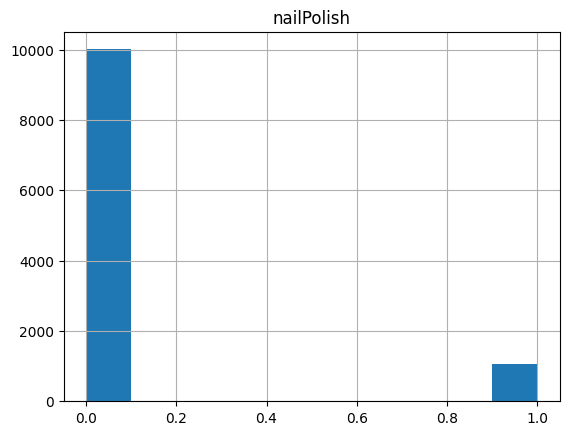

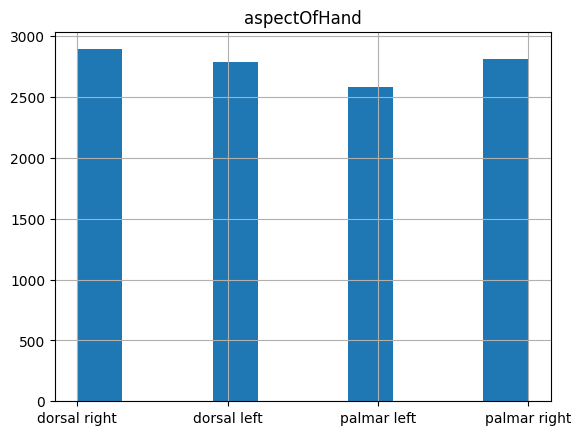

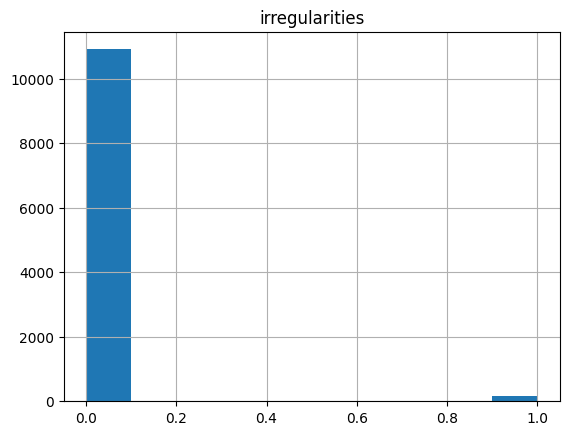

In [ ]:
def display_histograms(df):
    value_counts_dict={}
    cols_to_exclude=['imageName','id']
    for col_name in df.columns.to_list():
        if col_name not in cols_to_exclude:
            value_counts_dict[col_name]=df[col_name].value_counts()
            print(f'value_counts of {col_name} ',value_counts_dict[col_name])
            plt.figure()
            plt.title(col_name)
            df[col_name].hist()
            if col_name in ['age']:
                plt.figure()
                plt.title(col_name)
                plt.boxplot(df[col_name].to_list())
        # display(value_counts_dict[col_name])
        # display(HTML(value_counts_dict[col_name].to_html()))
display_histograms(df)

In [ ]:
# import matplotlib.pyplot as plt

'''
dataset_dir_path is path of folder with all hand images

'''

def display_sample_imgs_in_subplots(filenames_list,dataset_dir_path=dataset_dir_path,whole_fig_title=None, img_modify_fn=None):
    plt.figure(figsize=(10,8.5)).tight_layout(h_pad=2)
    # plt.figure(figsize=(10,8)).tight_layout(rect=[0, 0.03, 1, 0.7])


    if whole_fig_title != None:
        plt.suptitle(whole_fig_title) ## set main figure title

    if img_modify_fn == None:
        def img_modify_fn(img):
            return img ## if fn not specified do nothing

    last_i=0
    count=0
    for i,filename in enumerate(filenames_list):
        if (i==0) or (i == last_i+18):
            count+=1
            last_i=i
            plt.subplot(3,3,count)
            image=plt.imread(f'{dataset_dir_path}/{filename}')
            image=img_modify_fn(image)
            plt.imshow(image)
            plt.gca().set_title(filename) ## to set title for subplot
            plt.axis("off")

        if count >= 9:
            break
    plt.show()




def display_column_images(col_name_list,df=df,display_sample_imgs_in_subplots=display_sample_imgs_in_subplots):
    '''
    takes display_sample_imgs_in_subplots function as argument
    '''
    for col_name in col_name_list:
        print(f'\n{col_name}'.upper())
        irreg_imgs_names_list=df[df[col_name] != 0 ]['imageName'].to_list()
        print(df[col_name].value_counts())
        print(f'number of images with {col_name}',len(irreg_imgs_names_list))
        display_sample_imgs_in_subplots(irreg_imgs_names_list,whole_fig_title=col_name)





In [ ]:


col_name_list=['irregularities','accessories','nailPolish']
# df=pd.read_csv('HandInfo.csv')
# display_column_images(col_name_list,display_sample_imgs_in_subplots=display_sample_imgs_in_subplots) ###     takes display_sample_imgs_in_subplots function as argument


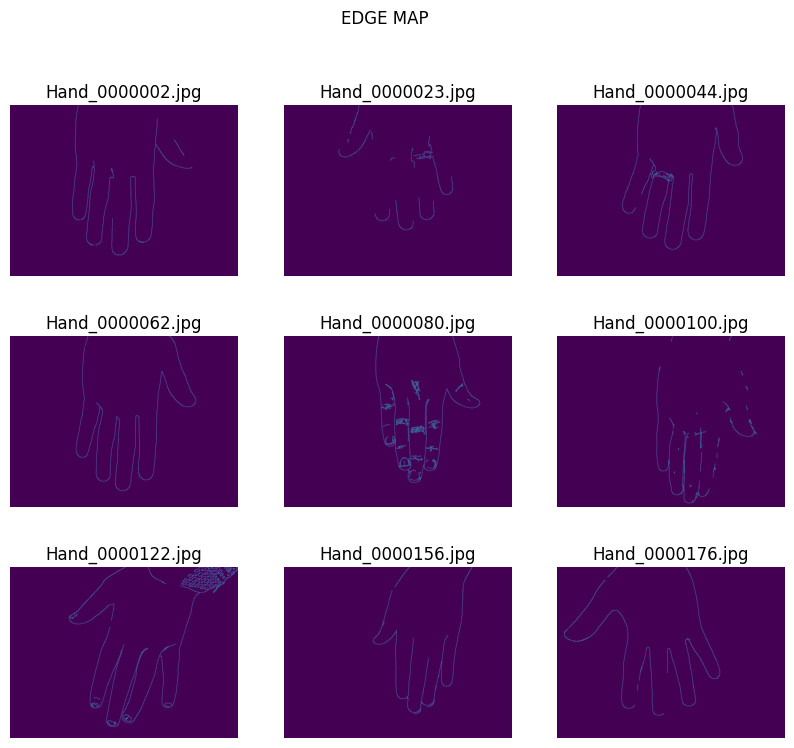

In [ ]:
### edge map

# image=cv2.imread(f'{dataset_dir_path}/Hand_0000002.jpg')

# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blurred = cv2.GaussianBlur(gray, (3, 3), 0)
# wide = cv2.Canny(blurred, 10, 200)
# mid = cv2.Canny(blurred, 30, 150)
# tight = cv2.Canny(blurred, 240, 250)

# mid.shape
# plt.imshow(mid)

def get_edge_map(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    wide = cv2.Canny(blurred, 10, 200)
    mid = cv2.Canny(blurred, 30, 150)
    tight = cv2.Canny(blurred, 240, 250)
    return mid

img_filename_list_to_plot=df['imageName'].to_list()
display_sample_imgs_in_subplots(img_filename_list_to_plot,whole_fig_title='EDGE MAP',img_modify_fn=get_edge_map)





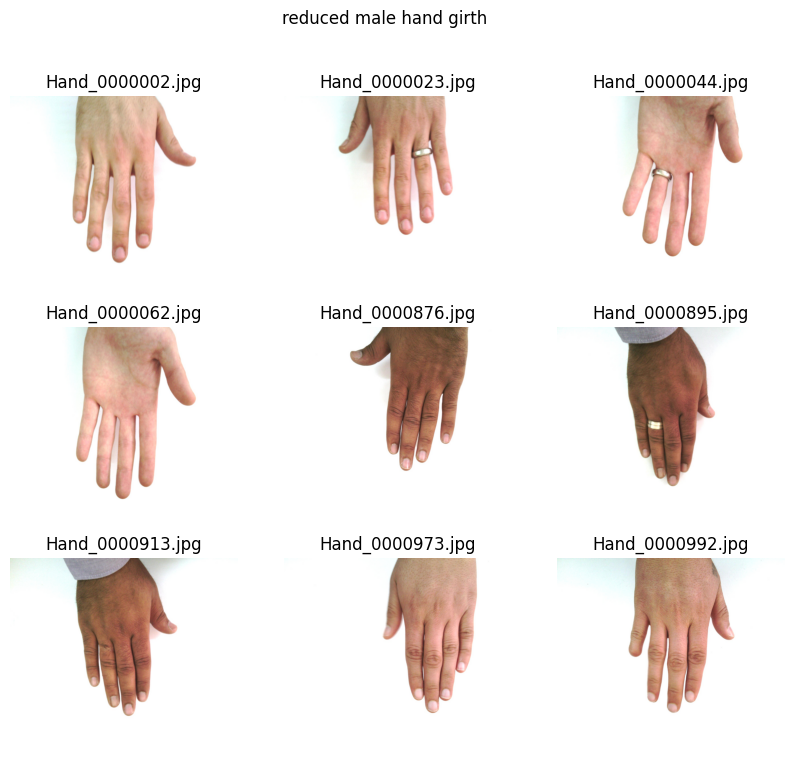

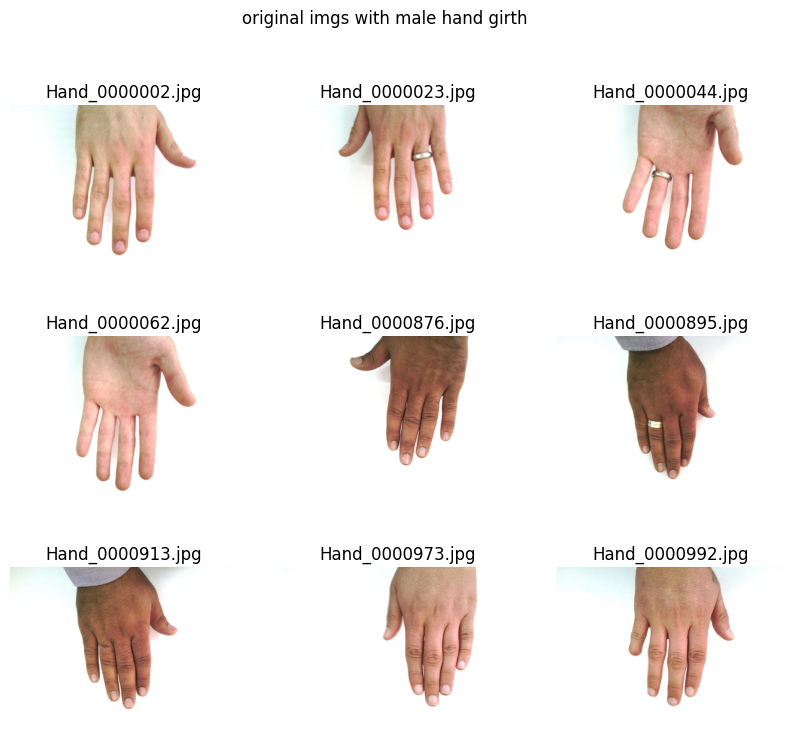

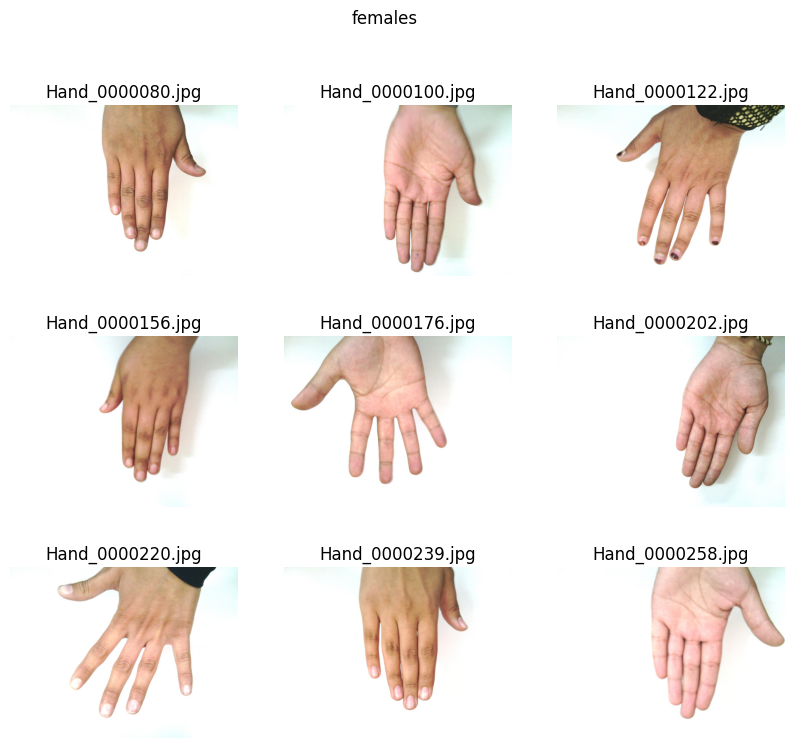

In [ ]:
def resize_to_reduce_male_hand_girth(img):
    resized_img=cv2.resize(img,(1200,1000))
    return resized_img

male_img_filenames=df[ df['gender'] == 'male' ]['imageName'].to_list()
female_img_filenames=df[ df['gender'] == 'female' ]['imageName'].to_list()

display_sample_imgs_in_subplots(male_img_filenames,whole_fig_title='reduced male hand girth',img_modify_fn=resize_to_reduce_male_hand_girth)
print('\n')
display_sample_imgs_in_subplots(male_img_filenames,whole_fig_title='original imgs with male hand girth',img_modify_fn=None)
print('\n')
display_sample_imgs_in_subplots(female_img_filenames,whole_fig_title='females')


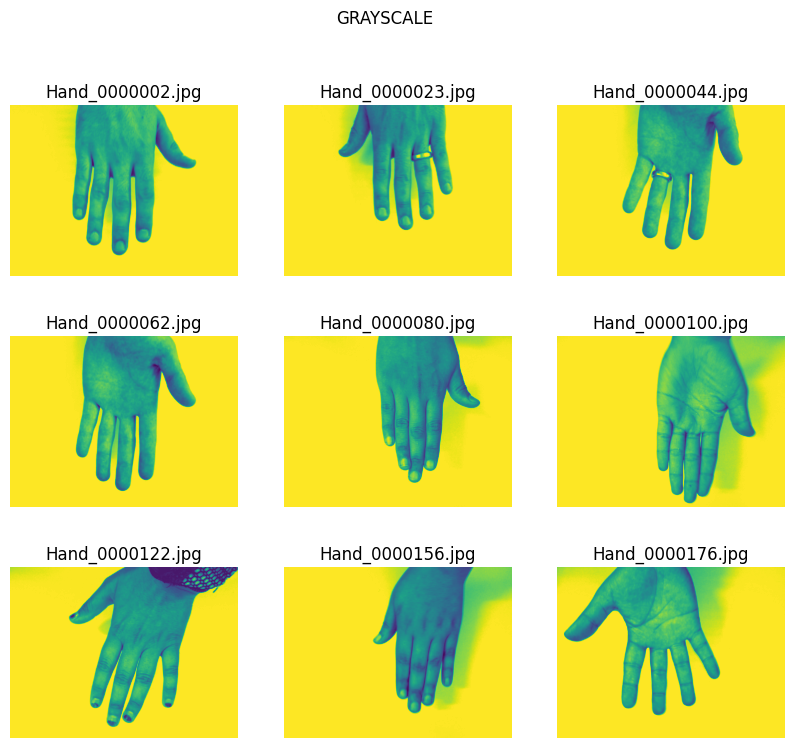

In [ ]:
def make_img_gray(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    # wide = cv2.Canny(blurred, 10, 200)
    # mid = cv2.Canny(blurred, 30, 150)
    # tight = cv2.Canny(blurred, 240, 250)
    return gray

img_filename_list_to_plot=df['imageName'].to_list()
display_sample_imgs_in_subplots(img_filename_list_to_plot,whole_fig_title='GRAYSCALE',img_modify_fn=make_img_gray)




### END OF EDA

In [ ]:



def get_col_val_list_in_alphabetical_order_file_names_dict(dataset_dir_path,csv_df):

    '''
    this function is needed in order to make the list of target labels to give as labels argument of
     the keras.utils.image_dataset_from_directory function.
     The keras.utils.image_dataset_from_directory function makes a tensorflow dataset object from the images inside
     a folder. the labels argument should be a list of target variables corresponding to images filenames as listed by
     os.walk('dataset_directory_path') function.

    So what this function does is, to output a dictionary. The dictionary takes the column names in the HandInfo.csv as keys.
    The value in the dictionary corresponding to the column name given as key in the dictionary, is a list,
    containing all the rows in the csv for that single column. The thing is the the rows in this list are ordered such
    that they correspond to the image_file in the order outputted by os.walk('dataset_directory_path').





    '''
    df=csv_df.set_index('imageName')

    from os import walk ## see https://hyp.is/DAhG1PfzEe2Qw3vXNIwQ3Q/www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
    # print(list(walk(dataset_dir_path))[0][2][0])
    img_filenames_list=list(walk(dataset_dir_path))[0][2]
    col_val_list_in_order_file_names_dict={}


    for col in df.columns.to_list():
        col_val_list_in_order_file_names_dict[col]=[]

        for filename in img_filenames_list:

            col_val_list_in_order_file_names_dict[col].append(df[col][filename])
    return col_val_list_in_order_file_names_dict


### execute the function to get the dictionary
col_val_list_in_order_file_names_dict=get_col_val_list_in_alphabetical_order_file_names_dict(dataset_dir_path,csv_df=df)


In [ ]:
### get the num of color channels in the images
def find_num_channels_in_imgs(dataset_dir_path):
    from os import walk ## see https://hyp.is/DAhG1PfzEe2Qw3vXNIwQ3Q/www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

    import cv2
    first_img_np=cv2.imread(f'{dataset_dir_path}/{list(walk(dataset_dir_path))[0][2][0]}')
    return first_img_np.shape[-1]
num_channels=find_num_channels_in_imgs(dataset_dir_path)

In [ ]:

### to get target labels for image_files in order as listed by os.walk('dataset_directory_path')
### in order to use it in keras.utils.image_dataset_from_directory
y_gen_nonenc=col_val_list_in_order_file_names_dict['gender']

### function to encode y_gen_nonenc to binary values
def encode_labels(y_nonenc,categories_list):
    from sklearn.preprocessing import OrdinalEncoder
    y_nonenc=np.array(y_nonenc).reshape(-1,1)
    oe=OrdinalEncoder(categories=[categories_list]) ## so that we know which category is 0 and 1; here male will be encoded as 0 and female 1
    y_enc_np=oe.fit_transform(y_nonenc)
    return y_enc_np

y_gen_enc_np=encode_labels(y_gen_nonenc,['male','female'])


In [ ]:
img_resize_shape=(240,320)
img_size_tuple=(img_resize_shape[0],img_resize_shape[1],num_channels)

test_fraction=0.2
seed=12
'''
The keras.utils.image_dataset_from_directory function makes a tensorflow dataset object from the images inside
a folder.
see https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
 the labels argument should be a list of target variables corresponding to images filenames as listed by
os.walk('dataset_directory_path') function.
'''

train_img_set_tfds, test_img_set_tfds=image_dataset_from_directory(
    dataset_dir_path,
    labels=y_gen_enc_np.flatten().tolist(),
    # labels=None,

    validation_split=test_fraction,
    subset='both',
    seed=seed,
    image_size=img_resize_shape,
    batch_size=8
    )

### to make a smaller dataset to do trial and error training ; so that the epochs will finish faster
small_train=train_img_set_tfds.take(400) ## 400 is the number of batches

Found 11076 files belonging to 2 classes.
Using 8861 files for training.
Using 2215 files for validation.


In [ ]:
# small_train.cardinality().numpy()

In [ ]:

## i don't know much about tensorflow dataset objects , check the documentation. - arjun

In [ ]:
### just to check if the contents of the tensorflow dataset obj are correct and  as intended

'''
count=0
for i,j in small_train:
    count+=1
    if count==1:
        print(i.numpy().shape) ### (batch_size, img_height, img_width, channels)
        print(j.numpy()) ## outputs labels for one batch

    else:
        break
# print(count)
'''



'\ncount=0\nfor i,j in small_train:\n    count+=1\n    if count==1:\n        print(i.numpy().shape) ### (batch_size, img_height, img_width, channels)\n        print(j.numpy()) ## outputs labels for one batch\n\n    else:\n        break\n# print(count)\n'

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Input, Dense, concatenate, Conv2D, MaxPooling2D, Dropout, Rescaling, RandomFlip, RandomRotation

In [ ]:
!pip install keras_cv &> /dev/null
import keras_cv


In [ ]:
# import matplotlib.pyplot as plt
# len(train_img_set_tfds.take(1))
# # plt.figure(figsize=(10, 10))
# for image,label in train_img_set_tfds.take(1):
#     plt.imshow(image.numpy().astype('uint8'))
#     plt.title(int(label))
#     plt.axis('off')

In [ ]:
img_size_tuple=(img_resize_shape[0],img_resize_shape[1],num_channels)

print(img_size_tuple )

(240, 320, 3)


In [ ]:
import tensorflow.keras as keras

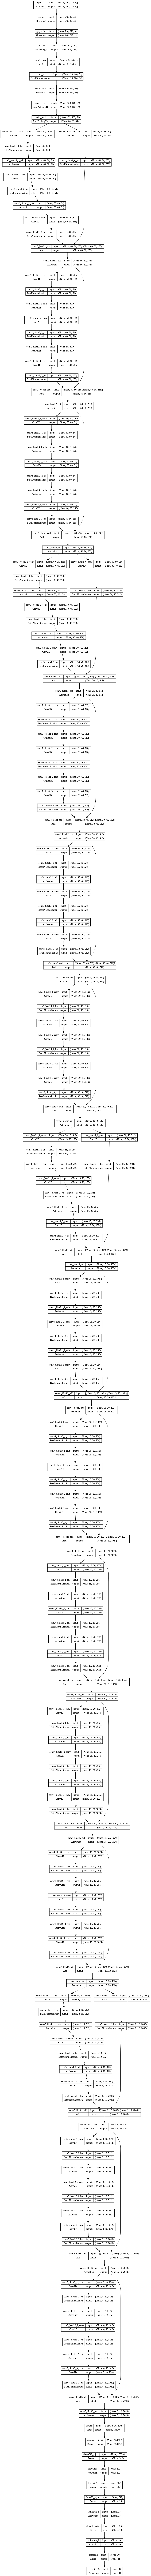

In [ ]:
img_size_tuple=(img_resize_shape[0],img_resize_shape[1],num_channels)

'''
please see  https://pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/
for understanding how to use functional api instead of keras.models.Sequential

and for understanding how to combine one model object with another etc.

'''


def make_resnet(img_size_tuple):
    input_layer=Input(shape=img_size_tuple )
    # resnet_model = keras.applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= img_size_tuple)
    # inputs = keras.Input(shape=input_shape)
    x = Rescaling(1.0 / 255)(input_layer)  # Rescale inputs

    x = keras_cv.layers.Grayscale()(x) ## [[2023-06-03]]-1222-23

    # resnet_model = keras.applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= img_size_tuple)
    # resnet_model = keras.applications.resnet50.ResNet50(weights= 'imagenet', input_tensor=x ,include_top=False)
    resnet_model = keras.applications.resnet50.ResNet50(weights= None, input_tensor=x ,include_top=False) ## try None weights [[2023-06-03]]-0934-50

    x= resnet_model.output
    x=Flatten()(x)
    ### keeping no. of dense nodes as square roots of previous layer nodes as suggested in pyimagesearch article [[2023-05-29]]-1934-06
    x=Dropout(0.4)(x)
    # x= Dense(512,activation='relu',name='dense512_arjun')(x)
    x= Dense(512,name='dense512_arjun')(x)

    x=keras.layers.Activation('relu')(x)
    x=Dropout(0.1)(x)
    x= Dense(25,name='dense25_arjun')(x)
    x=keras.layers.Activation('relu')(x)

    x= Dense(10,name='dense10_arjun')(x)
    x=keras.layers.Activation('relu')(x)



    # x = keras.layers.GlobalAveragePooling2D()(x) ## got these layers from dwivedi github code
    # x = keras.layers.Dropout(0.7)(x)
    model = Model(inputs= input_layer , outputs=x)
    return model

# resnet_model = keras.applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= img_size_tuple)


input_nets=[make_resnet(img_size_tuple)]
# input_nets=[resnet_model]


'''
please see  https://pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/
for understanding how to use functional api instead of keras.models.Sequential

and for understanding how to combine one model object with another etc.

'''


def make_final_keras_model(inputs_nets:list):
    ## this function is intended to combine one net that takes image
    ## as input and another that takes the metadata from the csv as input, together to form one single
    ## neural net

    ## but for now let's just try with the image net only as input
    x=input_nets[0].output

    x= Dense(1,name='dense1sig')(x) ## output layer to predict gender
    x=keras.layers.Activation('sigmoid')(x) ## output layer to predict gender

    final_model= Model(inputs=input_nets[0].input,outputs=x)
    return final_model




final_model=make_final_keras_model(input_nets)

### to visualise the model architecture
from tensorflow.keras.utils import plot_model
plot_model(final_model, show_shapes=True)

In [ ]:
# ! du -sh /content/drive/MyDrive/ML-AI_capstone_project/models | awk '{print $1}'

In [ ]:
final_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 240, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 240, 320, 3)  0           ['input_1[0][0]']                
                                                                                                  
 grayscale (Grayscale)          (None, 240, 320, 1)  0           ['rescaling[0][0]']              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 246, 326, 1)  0           ['grayscale[0][0]']        

## TRAINING

In [ ]:
### load previously saved keras models
# final_model=keras.models.load_model('/content/drive/MyDrive/ML-AI_capstone_project/models/m_2023-06-03-1415_model_81_epochs')

In [ ]:
### training
from keras.optimizers import SGD, Adam,RMSprop
final_model.compile(
    optimizer=SGD(0.01),
    # optimizer=RMSprop(lr=0.01),

    # optimizer=SGD(lr=0.01),
    # optimizer=Adam(lr=0.001),

    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
###### ! rm -r '/content/drive/MyDrive/ML-AI_capstone_project/models/callback_backup2'
### delete gdrive trash files (keras checkpoint files can accumulate in trash) [[2023-06-03]]-0922-27
### NOTE THAT THIS WILL CLEAR YOUR GOOGLE DRIVE TRASH
clear_gdrive_trash()

0


In [ ]:
from datetime import datetime
timestamp=datetime.now().strftime('%Y-%m-%d-%H%M')


### just to declare a model name so has to keep track of the model object when training and saving the model
model_name=f'm_2023-06-03-1415'


### just a text file to note down the approaches tried while training the model
with open(f'{drive_project_folder_path}/models/{model_name}_info.txt','w') as f:
    f.write('''
        m_2023-06-03-1415 model
        trained on small_train using .take(100) batch 32
        aimed for 100 epochs
        accuracy seems to be stuck at 65% after 68 epochs
    ''')

### CALLBACKS
### to understand these things see the docs for each callback listed in https://keras.io/api/callbacks/

! mkdir '/content/drive/MyDrive/ML-AI_capstone_project/models/callback_backup'
# ! mkdir '/content/drive/MyDrive/ML-AI_capstone_project/models/callback_checkpoint'

backup_dir='/content/drive/MyDrive/ML-AI_capstone_project/models/callback_backup'
checkpoint_filepath=f'{drive_project_folder_path}/models/callback_checkpoint'

backup_callback = keras.callbacks.BackupAndRestore(backup_dir=backup_dir)
reduce_lr_plateau=keras.callbacks.ReduceLROnPlateau()
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
csvlogger_callback=keras.callbacks.CSVLogger(
    filename=f'{drive_project_folder_path}/models/{model_name}_CSV_epochs_stats.csv',
    append=True
    )



mkdir: cannot create directory ‘/content/drive/MyDrive/ML-AI_capstone_project/models/callback_backup’: File exists


In [ ]:
### list of callbacks to use when fitting
### (note that using backup_callback might fill up hard drive space in google drive quickly)



# callbacks_list=[backup_callback,reduce_lr_plateau,model_checkpoint_callback,csvlogger_callback]
callbacks_list=[reduce_lr_plateau,model_checkpoint_callback,csvlogger_callback]
# callbacks_list=[model_checkpoint_callback,csvlogger_callback]
# callbacks_list=[csvlogger_callback]
# callbacks_list=[]

### MODEL TRAINING

final_model.fit(
    # train_img_set_tfds,
    small_train,
    # y=y_gen_enc,
    epochs=100,
    validation_data=test_img_set_tfds,
    # batch_size=5,
    class_weight={0:(1/3967), 1:(1/7109)},
    callbacks=[callbacks_list]
)
clear_gdrive_trash()

Epoch 1/100
  1/400 [..............................] - ETA: 3:01:53 - loss: 1.5388e-04 - accuracy: 0.3750

KeyboardInterrupt: ignored

In [ ]:
  # ! du -sh /content/drive/MyDrive/ML-AI_capstone_project/models/m_2023-06-03-1415_model_81_epochs

In [ ]:
### to save trained keras model to drive

# final_model.save_weights(f'{drive_project_folder_path}/models/2023-05-29_weights_SGD_resnet')
# final_model.save_weights(f'{drive_project_folder_path}/models/2023-06-03_512dense_240x320res_adam_resnet_noimagenet')
final_model.save(f'{drive_project_folder_path}/models/{model_name}_model')